# Liste des modules

In [1]:
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

path="/media/jhy/46AE-6494/DB/img/food/fruits_base_light/"
train_data_dir = path +'/Train'
test_data_dir = path + 'Test'

size = (100,100)

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=1,
      width_shift_range=0.25,
      height_shift_range=0.25,
      horizontal_flip=True,
      vertical_flip = True,
      fill_mode='nearest')
 
test_datagen = ImageDataGenerator(rescale=1./255)
 
Train = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=size,
        batch_size =20,
        color_mode = "rgb",
        class_mode='categorical',
        shuffle=True)
 
Test = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=size,
        batch_size=20,
        color_mode = "rgb",
        class_mode='categorical',
        shuffle=False)

#if rgb  = 3
layer = 3
shape = size + (layer,)

Found 4835 images belonging to 10 classes.
Found 1620 images belonging to 10 classes.


In [2]:
 label_map = (Train.class_indices)
 print(label_map)
 num_classes = len(label_map)

{'Apple': 0, 'Avocado': 1, 'Banana': 2, 'Kiwi': 3, 'Nut Pecan': 4, 'Orange': 5, 'Passion Fruit': 6, 'Pear': 7, 'Pineapple': 8, 'Watermelon': 9}


In [3]:


model = Sequential([
      Conv2D(num_classes * 1, kernel_size=(5,5), activation='relu', input_shape=shape)
    , MaxPooling2D()
    , Conv2D(num_classes * 2, kernel_size=(5,5), activation='relu')
    , MaxPooling2D()
    , Dropout(0.20)
    , Conv2D(num_classes * 3, kernel_size=(5,5), activation='relu')
    , MaxPooling2D()
    , Dropout(0.30)
    , Flatten()
    , Dense(num_classes , activation = "softmax")
    ])

In [4]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint(path+"/fruits_fresh_cnn_1.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])



In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 10)        760       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 20)        5020      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 20)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 30)        15030     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 30)          0

In [32]:
history = model.fit(
    Train,
    epochs = 5,
    callbacks = callbacks,
    validation_data = Test,
    )

Epoch 1/5
242/242 [==============================] - 24s 97ms/step - loss: 0.0936 - accuracy: 0.9671 - val_loss: 0.0219 - val_accuracy: 0.9877

Epoch 00001: val_loss improved from 0.02522 to 0.02189, saving model to /media/jhy/46AE-6494/DB/img/food/fruits_base_light/fruits_fresh_cnn_1.h5
Epoch 2/5
242/242 [==============================] - 23s 95ms/step - loss: 0.0381 - accuracy: 0.9861 - val_loss: 0.0032 - val_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.02189 to 0.00325, saving model to /media/jhy/46AE-6494/DB/img/food/fruits_base_light/fruits_fresh_cnn_1.h5
Epoch 3/5
242/242 [==============================] - 23s 97ms/step - loss: 0.0320 - accuracy: 0.9907 - val_loss: 0.0400 - val_accuracy: 0.9840

Epoch 00003: val_loss did not improve from 0.00325
Epoch 4/5
242/242 [==============================] - 24s 98ms/step - loss: 0.0391 - accuracy: 0.9878 - val_loss: 0.0063 - val_accuracy: 0.9969

Epoch 00004: val_loss did not improve from 0.00325
Epoch 5/5
242/242 [=============

In [33]:
from sklearn.metrics import classification_report
import numpy as np

#Confution Matrix and Classification Report
Y_pred = model.predict(Test)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
target_names = list(Test.class_indices.keys())
print(classification_report(Test.classes, y_pred, target_names=target_names))

Classification Report
               precision    recall  f1-score   support

        Apple       1.00      1.00      1.00       164
      Avocado       1.00      1.00      1.00       143
       Banana       1.00      1.00      1.00       166
         Kiwi       1.00      1.00      1.00       156
    Nut Pecan       1.00      1.00      1.00       178
       Orange       1.00      1.00      1.00       160
Passion Fruit       1.00      1.00      1.00       166
         Pear       1.00      1.00      1.00       164
    Pineapple       1.00      1.00      1.00       166
   Watermelon       1.00      1.00      1.00       157

     accuracy                           1.00      1620
    macro avg       1.00      1.00      1.00      1620
 weighted avg       1.00      1.00      1.00      1620



## TEST

In [56]:
def prediction (img_path,size = size):
    from tensorflow.keras.preprocessing import image
    import numpy as np
    
    img = image.load_img(img_path, target_size=size, color_mode = "rgb")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    result = model.predict(x)
    y_classes = result.argmax(axis=-1)

    #return y_classes

    for keys, values in label_map.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
        if values == y_classes:
            return(keys)

In [57]:
from IPython.display import Image

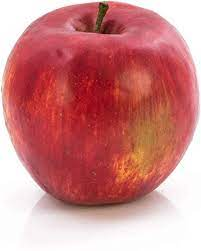

In [58]:
img_path="/media/jhy/46AE-6494/DB/img/food/Validation foodies/Pomme.jpeg"
Image(filename=img_path)


In [59]:
prediction(img_path)

'Apple'

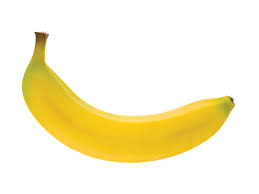

In [60]:
img_path="/media/jhy/46AE-6494/DB/img/food/Validation foodies/Banane.jpeg"
Image(filename=img_path)

In [62]:
prediction(img_path)

'Banana'

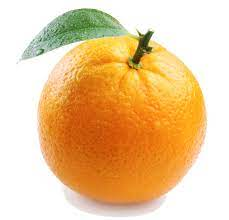

In [63]:
img_path="/media/jhy/46AE-6494/DB/img/food/Validation foodies/Orange.jpeg"
Image(filename=img_path)

In [64]:
prediction(img_path)

'Orange'

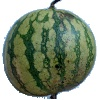

In [79]:
img_path="/media/jhy/46AE-6494/DB/img/food/Validation foodies/Pasteque.jpeg"
Image(filename=img_path)

In [80]:
prediction(img_path)

'Watermelon'

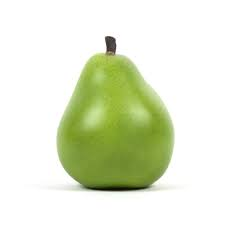

In [94]:
img_path="/media/jhy/46AE-6494/DB/img/food/Validation foodies/Poire.jpeg"
Image(filename=img_path)

In [95]:
prediction(img_path)

'Pear'

In [96]:
model.save('models/modele-prototype-10')

INFO:tensorflow:Assets written to: models/modele-prototype-10/assets
INFO:tensorflow:Assets written to: models/modele-prototype-10/assets


In [97]:
import pickle 

a_file = open("models/modele-prototype-10.pkl", "wb")

pickle.dump(label_map, a_file)

a_file.close()